In [1]:
!pip install keras tensorflow streamlit streamlit-drawable-canvas


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.1 MB 5.3 MB/s eta 0:00:01
   ------------------------------- -------- 0.9/1.1 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 9.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 1.9/385.0 MB 40.5 MB/s eta 0:00:10
   ---------------------------------------- 2.7/385.0 MB 42.9 MB/s eta 0:00:09
   ---------------------------------------- 4.1/385.0 MB 29.0 MB/s eta 0:00:14
    --------------------------------------- 6.0/385.0 MB 34.8 MB/s eta 0:00:11
    --------------------------------------- 7.5/385.0 MB 34.0 MB/s eta 0:00:12
    -

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import streamlit as st
from PIL import Image, ImageOps

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

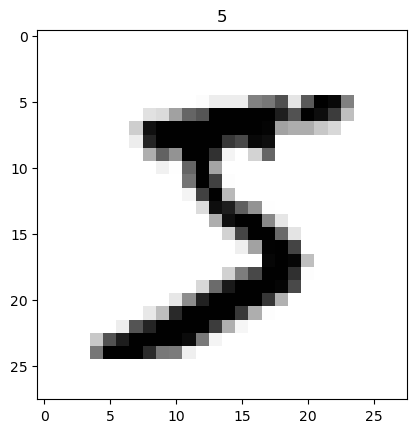

In [6]:
plt.imshow(X_train[0],cmap='binary')
plt.title(y_train[0])
plt.show()

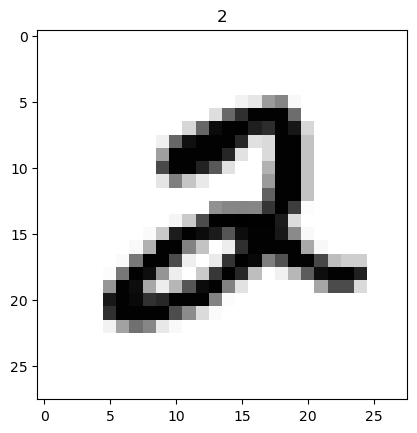

In [7]:
plt.imshow(X_train[5],cmap='binary')
plt.title(y_train[5])
plt.show()

In [8]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [9]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [10]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

C:\Users\sauga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)
mc= ModelCheckpoint("./bestmodel.h5.keras", monitor="val_acc",verbose=1,save_best_only=True)
cb=[es,mc]

In [17]:

his = model.fit(X_train, y_train, epochs=50, validation_split=0.3)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8443 - loss: 0.4793 - val_accuracy: 0.9760 - val_loss: 0.0795
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9746 - loss: 0.0770 - val_accuracy: 0.9814 - val_loss: 0.0627
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9816 - loss: 0.0582 - val_accuracy: 0.9827 - val_loss: 0.0576
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9862 - loss: 0.0433 - val_accuracy: 0.9874 - val_loss: 0.0445
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9876 - loss: 0.0373 - val_accuracy: 0.9873 - val_loss: 0.0426
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9868 - val_loss: 0.0447
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9907 - loss: 0.0272 - val_accuracy: 0.9872 - val_loss: 0.0451
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9924 - loss: 0.0229 -

In [18]:
model.save('mnistmodel.keras')

In [19]:
saved_model = load_model('mnistmodel.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'mnistmodel.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
saved_model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
score = saved_model.evaluate(X_test,y_test)
print(f" the model accuray is {score[1]}")